<a href="https://colab.research.google.com/github/gbagolin/ttr-project/blob/master/three_class_svm_fe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!wget -O three_classes.zip "https://www.dropbox.com/s/yoaiztoj69p5g6m/three_classes.zip?dl=0"

--2020-06-19 10:29:32--  https://www.dropbox.com/s/yoaiztoj69p5g6m/three_classes.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/yoaiztoj69p5g6m/three_classes.zip [following]
--2020-06-19 10:29:32--  https://www.dropbox.com/s/raw/yoaiztoj69p5g6m/three_classes.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc110d99724f1b038c0385f3839f.dl.dropboxusercontent.com/cd/0/inline/A5-t4iYmTrGhgP1IJSjW-ym8-hJJemkjx5N0ISVWeiTCSAHVb_wRVD_y3XPh5O1nfy86L9Dee9AvZP23x6JAjKpdaR1SXbzLQ6M4RPo1MOCbEGM1pC_XVzaP5kAyO1h28y4/file# [following]
--2020-06-19 10:29:32--  https://uc110d99724f1b038c0385f3839f.dl.dropboxusercontent.com/cd/0/inline/A5-t4iYmTrGhgP1IJSjW-ym8-hJJemkjx5N0ISVWeiTCSAHVb_wRVD_y3XPh5O1nfy86L9Dee9AvZP23x6JAjKpdaR1SXb

In [ ]:
!unzip three_classes.zip

In [2]:
from sklearn.svm import SVC
from upload_dataset import upload_dataset
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

from resnet import FeaturesExtractor

import numpy as np
import cv2


In [10]:
#Parameters initialization

NUM_CLASSES = 3

extractor = FeaturesExtractor()

#Dataset initialization
labels = []
features = []
class_list = range(3)

for i in class_list: 

  print("Iteration: ", i)
  tmp_dataset, tmp_labels = upload_dataset('three_classes/{0}/'.format(i), i)
  labels.append(tmp_labels)

  for img in tmp_dataset: 
    features.append(extractor.getFeatures(img))

Iteration:  0
Iteration:  1
Iteration:  2


In [11]:
# Tensor conversion to numpy
X = [t.numpy() for t in features]
X = np.array(X) 
print("N Row = N Elements: {}, N Col = N Features: {}".format(X.shape[0], X.shape[1]))

N Row = N Elements: 2922, N Col = N Features: 2048


In [12]:
#Labels Declaration 
y = [] 
for label_list in labels:
  for element in label_list: 
    y.append(element)

In [16]:
from sklearn.model_selection import train_test_split
random_state = 0
# Split into train/test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.1, stratify=y,
                     random_state=random_state)

y_train = np.array(y_train)
y_test = np.array(y_test)

print("N Elements train: ", X_train.shape[0])
print("N Elements test: ", X_test.shape[0])

N Elements train:  2629
N Elements test:  293


In [17]:
from sklearn import svm
kernel = 'rbf'
max_iteration = 10**6
classifier = svm.SVC(kernel=kernel, max_iter=max_iteration, C = 5).fit(X_train, y_train)

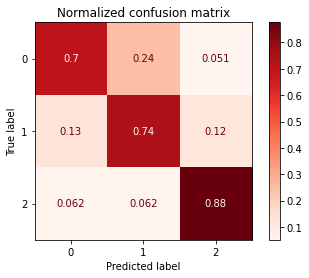

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_list,
                                 cmap=plt.cm.Reds,
                                 normalize='true')

disp.ax_.set_title("Normalized confusion matrix")

plt.show()